In [5]:
import pandas as pd
import numpy as np

from scipy import stats
from scipy.stats import uniform
from sympy import *
from scipy.stats import rv_continuous

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.offline as py
import plotly.graph_objects as go


pd.options.display.float_format = '{:,.4f}'.format

import warnings
warnings.filterwarnings("ignore")

from typing import Tuple

%matplotlib inline

## Задача 1

Имеются выборочные данные о числе сделок, заключенных фирмой с частными лицами в
течение месяца:

| число заключенных сделок | 0-10 | 10-20 | 20-30 | 30-40 | 40-50 |
| --- | --- | --- | --- | --- | --- |
| число частных лиц | 23 | 24 | 11 | 9 | 3 |

Проверить при уровне значимости $α=0,05$, используя критерий согласия Колмогорова,
гипотезу о нормальном законе распределения. 

In [6]:
# в итнервалах берем конечные значения 

df = pd.DataFrame({'x_i':np.arange(10, 60, 10), 'n_i':[23, 24, 11, 9, 3]})

df

,x_i,n_i
0,10,23
1,20,24
2,30,11
3,40,9
4,50,3


#### Рассчет вручную для $\mu = 17.143, \sigma=11.659$

In [7]:
df['w_i'] = df['n_i'] / df['n_i'].sum()
df['cumsum'] = df['w_i'].cumsum()
df['norm_cdf'] = stats.norm(loc=17.143, scale=11.659).cdf(df['x_i'])
df['diff'] = abs(df['cumsum'] - df['norm_cdf'])

df['diff'].max() * np.sqrt(70)

0.6244720837900759

#### Рассчет вручную для $\mu = 10, \sigma=4$

In [8]:
df['w_i'] = df['n_i'] / df['n_i'].sum()
df['cumsum'] = df['w_i'].cumsum()
df['norm_cdf'] = stats.norm(loc=10, scale=4).cdf(df['x_i'])
df['diff'] = abs(df['cumsum'] - df['norm_cdf'])

df['diff'].max() * np.sqrt(70)

2.697072013906789

#### Рассчет через stats.kstest

In [11]:
# Разгруппируем данные

df['unstuck'] = df.apply(lambda row: list([row["x_i"]]) * int(row["n_i"]), axis=1)

df_unstuck = df[['unstuck']]

df_unstuck = df_unstuck.explode('unstuck')

df_unstuck['unstuck'] = df_unstuck['unstuck'].apply(lambda x: int(x))

df_unstuck

,unstuck
0,10
0,10
0,10
0,10
0,10
...,...
3,40
3,40
4,50
4,50


#### Рассчет через stats.kstest для $\mu = 17.143, \sigma=11.659$

In [12]:
rng = np.random.default_rng(234)

norm_sample = stats.norm.rvs(loc=17.143, scale=11.659, size=70, random_state=rng)
stats.kstest(df_unstuck.unstuck, norm_sample)

KstestResult(statistic=0.2857142857142857, pvalue=0.006350814093498427)

#### Рассчет через stats.kstest для $\mu = 10, \sigma=4$

In [13]:
rng = np.random.default_rng(234)

norm_sample = stats.norm.rvs(loc=10, scale=4, size=70,  random_state=rng)
stats.kstest(df_unstuck.unstuck, norm_sample)

KstestResult(statistic=0.6714285714285714, pvalue=2.7961599189123163e-15)

## Задача 2

Используя критерий Колмогорова, проверить на уровне значимости **10%** гипотезу о том, что выборка

$0,90; 0,56; 0,05; 0,21; 0,97; 0,80; 0,04; 0,12; 0,73; 0,49$

является выборкой наблюдений равномерно распределённой случайной величины $X \thicksim R(0, 1)$.

In [403]:
sample = [0.9, 0.56, 0.05, 0.21, 0.97, 0.8, 0.04, 0.12, 0.73, 0.49]

#### Рассчет вручную 

In [449]:
sample.sort()

In [479]:
df = pd.DataFrame({'x_i':sample, 'n_i':[1]*len(sample)})
df['w_i'] = df['n_i'] / df['n_i'].sum()
df['cumsum'] = df['w_i'].cumsum()
df['norm_cdf'] = stats.uniform(loc=0, scale=1).cdf(df['x_i'])
df['diff'] = abs(df['cumsum'] - df['norm_cdf'])

T = df['diff'].max() * np.sqrt(len(sample))
z_0_9 =1.22

print(T)
if T < z_0_9:
    print(f'T < {z_0_9}, следовательно'
          f' не можем отвергнуть гипотезу, что данная выборка могла быть получена из равномерного распределения R(0, 1)')
else:
    print(f'T > {z_0_9}, следовательно'
          f' можем отвергнуть гипотезу, что данная выборка могла быть получена из равномерного распределения R(0, 1)')

0.6008327554319922
T < 1.22, следовательно не можем отвергнуть гипотезу, что данная выборка могла быть получена из равномерного распределения R(0, 1)


<AxesSubplot:ylabel='Proportion'>

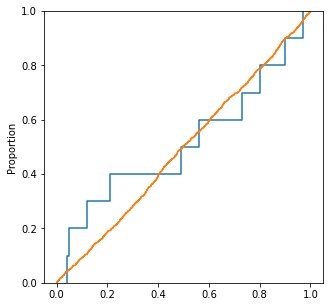

In [448]:
rng = np.random.default_rng(153)

fig, ax = plt.subplots(1, 1, figsize=[5, 5])
sns.ecdfplot(data=sample)
sns.ecdfplot(data=stats.uniform.rvs(size=1000, loc=0, scale=1, random_state=rng))

#### Рассчет с помощью stats.kstest

In [405]:
stats.kstest(sample, 'uniform')

KstestResult(statistic=0.19000000000000003, pvalue=0.7994599807966073)

In [473]:
rng = np.random.default_rng(101)

uniform_sample = stats.uniform.rvs(size=1000, loc=0, scale=1, random_state=rng)
stats.kstest(sample, uniform_sample)

KstestResult(statistic=0.189, pvalue=0.8103582156913072)

In [502]:
D, p_value = stats.kstest(sample, 'uniform')
a = 0.1


print(f'Статистика: {D}, p-value: {p_value}')
if p_value > a:
    print(f'p_value > \N{GREEK SMALL LETTER ALPHA}, следовательно'
          f' не можем отвергнуть гипотезу, что данная выборка могла быть получена из равномерного распределения R(0, 1)')
else:
    print(f'p_value < \N{GREEK SMALL LETTER ALPHA}, следовательно'
          f' можем отвергнуть гипотезу, что данная выборка могла быть получена из равномерного распределения R(0, 1)')

Статистика: 0.19000000000000003, p-value: 0.7994599807966073
p_value > α, следовательно не можем отвергнуть гипотезу, что данная выборка могла быть получена из равномерного распределения R(0, 1)
